In [1]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd

Read in ShapeFile

In [3]:
shfile_dir = "/Users/ysbecca/ysbecca-projects/ssense-hackathon/sea_ice/"
shfile_name = "seaice_s1_20180116t075430.shp"
                    # 20180116T075430

shfile = gpd.read_file(shfile_dir + shfile_name)

In [4]:
shfile.head()

,id,CA,SA,FA,CB,SB,FB,CT,poly_type,area,perimeter,geometry
0,1,99,99,99,99,99,99,99,I,10797710,27049,"POLYGON ((-489524.300 -1426091.270, -488551.97..."
1,2,99,99,99,99,99,99,99,W,77404396626,2078665,"POLYGON ((-386420.098 -1661503.239, -386646.67..."
2,3,99,99,99,99,99,99,99,I,145176122,64674,"POLYGON ((-485920.665 -1506863.657, -483911.10..."
3,4,99,99,99,99,99,99,99,L,10137,572,"POLYGON ((-470402.672 -1412012.139, -470511.58..."
4,5,99,99,99,99,99,99,99,L,1284942354,277299,"POLYGON ((-503153.134 -1606829.784, -503172.44..."


In [80]:
shfile['poly_type'][1]

'W'

In [74]:
shfile['geometry'][1].contains(Point(-386400, -1661500))

True

In [85]:
shfile['geometry'][0].bounds

(-489524.2998289292, -1428619.0648058269, -485138.8160253342, -1423462.1413813)

In [87]:
point = Point(-489549, -485199)
shfile['geometry'][0].contains(point)

False

In [125]:
# fig, ax = plt.subplots(figsize = (10,10))

# # quickly plot the data adding a legend
# shfile.plot(column='poly_type', 
#                          categorical=True, 
#                          legend=True, 
#                          figsize=(10,6),
#                          markersize=45, 
#                          cmap="Set2", ax=ax);

# plt.show()

In [20]:
sample = shfile.loc[0].geometry

In [23]:
sample.bounds

(-489524.2998289292, -1428619.0648058269, -485138.8160253342, -1423462.1413813)

In [7]:
from PIL import Image

In [13]:
tif_file_dir = "/Users/ysbecca/ysbecca-projects/ssense-hackathon/tifs/"
tif_file = "S1A_EW_GRDM_1SDH_20180116T075430_20180116T075530_020177_0226B9_9FE3_Orb_Cal_Spk_TC_rgb_8bit.tif"

In [51]:
tif = cv2.imread(tif_file_dir + "test.tif")

In [52]:
tif.shape

(14202, 14299, 3)

In [113]:
# start_x = 8000
# start_y = 7000

start_x = -386400
start_y = -1661500

K = 50
sub_image = tif[start_x:start_x + K, start_y:start_y + K] 
sub_image.shape

(0, 0, 3)

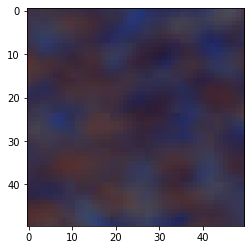

In [65]:
plt.imshow(sub_image)
plt.show()

In [78]:
from shapely.geometry import Point

point = Point(-1* (start_x + int(K / 2)), -1* (start_y + int(K / 2)))

# for poly in shfile['geometry']:
#     print(poly)
#     print(poly.contains(point))

# GeoSeries.contains(self, other)

In [110]:
shfile.crs

<Projected CRS: PROJCS["Stereographic / World Geodetic System 1984 ...>
Name: Stereographic / World Geodetic System 1984|
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Stereographic
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

AttributeError: 'DataArray' object has no attribute 'bounds'

In [95]:
import rasterio
import rasterio.mask
import rioxarray

In [146]:


src = rasterio.open(tif_file_dir + tif_file)

In [147]:
src.shape

(15218, 15564)

In [162]:
src.transform

Affine(40.0, 0.0, -641345.5143141792,
       0.0, -40.0, -1225812.3968040443)

In [163]:
src.transform * (0, 0)

(-641345.5143141792, -1225812.3968040443)

In [165]:
src.transform * (src.width, src.height)

(-18785.514314179192, -1834532.3968040443)

In [166]:
src.transform * (8000, 5000)

(-321345.5143141792, -1425812.3968040443)

In [167]:
p

(14202, 14299, 3)

In [169]:
src.width, src.height

(15564, 15218)

In [159]:
dataset = rioxarray.open_rasterio(tif_file_dir + tif_file)

In [156]:
print(dataset.rio.crs)
print(dataset.rio.nodata)
print(dataset.rio.bounds())
print(dataset.rio.width)
print(dataset.rio.height)

PROJCS["Stereographic / World Geodetic System 1984|",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Stereographic"],PARAMETER["latitude_of_origin",90],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
0
(-641345.5143141792, -1834532.3968040443, -18785.514314179192, -1225812.3968040443)
15564
15218


In [161]:
dataset = dataset.read(1)

AttributeError: 'DataArray' object has no attribute 'read'

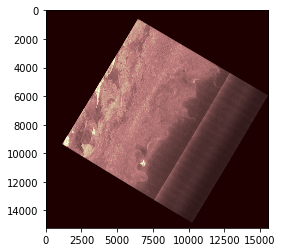

In [93]:
plt.imshow(one_map, cmap='pink')
plt.show()

In [38]:
import fiona
import numpy as np

In [27]:
with fiona.open(shfile_dir + shfile_name, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [133]:
dataset.rio.crs.is_projected

True

In [136]:
from rasterio.crs import CRS

In [139]:
utm = pyproj.Proj(dataset.rio.crs) # Pass CRS of image from rasterio
proj_string = "+proj=stere +lat_0=90 +lat_ts=90 +lon_0=0 +ellps=WGS84 +datum=WGS84"
crs = CRS.from_proj4(proj_string)

# lonlat = pyproj.Proj(init='epsg:4326')
x = -489524.2998289292
y = -485138.8160253342

In [150]:
x_, y_ = src.index(x, y)

TypeError: 'DatasetReader' object is not subscriptable

In [127]:
# out_image, out_transform = rasterio.mask.mask(dataset, shapes, crop=True)

In [41]:
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open(tif_file_dir + "test.tif", "w", **out_meta) as dest:
    dest.write(out_image)

In [43]:
out_meta = dataset.meta


In [44]:
import cv2

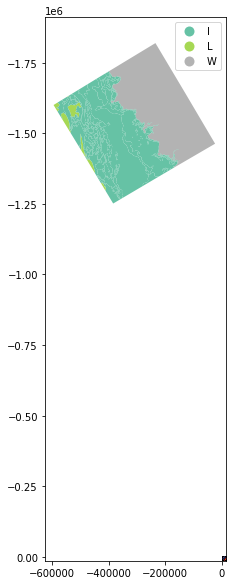

In [46]:
fig, ax = plt.subplots(figsize = (10,10))

im = cv2.imread(tif_file_dir + "test.tif")
plt.imshow(im)

# quickly plot the data adding a legend
shfile.plot(column='poly_type', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=45, 
                         cmap="Set2", ax=ax);

plt.show()